**Méthode SGD**

La méthode SGD est une méthode d'optimisation itérative.

La fonction objectif s'écrit:

$$R_n(w)=\frac{1}{n} \sum_{i=1}^{n} (y_i-w^{T}x_i)^2$$

En posant $W \sim U([|1,n|])$ il vient $R_n(w)=\mathbb{E}((y_{W}-w^{T}x_{W})^2)=\mathbb{E}(j(w,W))$.

Soit $h \in \mathbb{R^{d}}$ quelconque.

$$R_n(w+h)=\frac{1}{n} \sum_{i=1}^{n} (y_i-(w+h)^{T}x_i)^2=\frac{1}{n} \sum_{i=1}^{n} ((y_i-w^{T}x_i)^2-2(y_i-w^{T}x_i)h^{T}x_i+(h^{T}x_i)^2)$$

Donc $R_n(w+h)=R_n(w)-\frac{2}{n} \sum_{i=1}^{n} (y_i-w^{T}x_i)h^{T}x_i + o(||h||)$.

Donc $R_n(\cdot)$ est différentiable en $w$ et son gradient est:

$$\nabla R_n(w)=\frac{2}{n} \sum_{i=1}^{n} (w^{T}x_i-y_i)x_i=\mathbb{E}(2x_W(w^{T}x_W-y_W))=\mathbb{E}(g(w,W))$$

Ici, la méthode du gradient stochastique consiste à partir d'un $w_0 \in \mathbb{R}^{d}$ et d'une suite de pas décroissante $(\epsilon_k)_{k \in \mathbb{N}}$.

L'itération $k \in \mathbb{N}$ de l'algorithme s'écrit:

* Tirage de $W_{k+1}$ selon la loi $\mathbb{P}_{W}=U([|1,n|])$
* Mise à jour des poids: $$w_{k+1}=w_k-\epsilon_{k+1}g(w_k,W_{k+1})$$

Implémentons cet algorithme avec $\epsilon_k=0.001$.

In [344]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [345]:
def g(x,y,w,W):
  return(2*x[W,:]*(w.reshape(1,len(x[0])) @ x[W,:].reshape(len(x[0]),1) - y[W]))

def Rn(x,y,w,n):
  Rn=0
  for i in range(n):
    Rn+=(y[i]-w.reshape(1,len(x[0])) @ x[i,:].reshape(len(x[0]),1))**2
  return Rn[0]/n

def SGD(x,y,cmax): # cmax c'est la valeur maximale du compteur
  n=len(y)
  compteur=0
  wk=[] # pour stocker la valeur de w à chaque itération
  wk.append(np.random.randn(len(x[0]),1))
  R=[Rn(x,y,wk[0],n)] # pour stocker les valeurs de R à chaque itération
  while compteur<cmax:
    Wkp1=rd.randint(0,n-1)
    wk.append(wk[compteur]-0.001*g(x,y,wk[compteur],Wkp1).reshape(len(x[0]),1)) # .reshape(len(x[0]),1)   est la commande la + importante ici (elle sert à dimensionner correctement g(X,y,wk,Wkp1) avant de continuer les calculs) (Numpy ne dimensionne pas ses vecteurs, ce qui pose rapidement des problèmes)
    R.append(Rn(x,y,wk[compteur+1],n))
    compteur+=1
  return wk,R


Génération aléatoire de 100 points de $\mathbb{R}^2$

In [346]:
x=np.random.randn(100,2)

Génération aléatoire d'un $w$ (qui va nous servir à construire les $y_i$)

In [347]:
w=np.random.randn(2,1)

Pour tout $i$, $X[i,0]$ est l'abscisse du point $x_i$ et $X[i,1]$ est l'ordonnée du point $x_i$. Génération de $y$ :

In [348]:
y=np.sign(x@w)

On applique l'algorithme SGD.

In [352]:
wk,R=SGD(x,y,3000)

On représente graphiquement l'évolution de $R_n$.

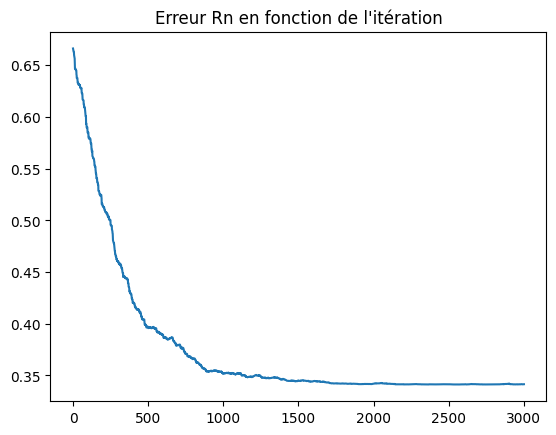

In [353]:
plt.plot(np.arange(len(R)), R)
plt.title("Erreur Rn en fonction de l'itération")

plt.show()

<ipython-input-354-4c5789e873d0>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ps[k]=(wk[k][0]*w[0]+wk[k][1]*w[1])/(np.sqrt(wk[k][0]**2+wk[k][1]**2)*np.sqrt(w[0]**2+w[1]**2))


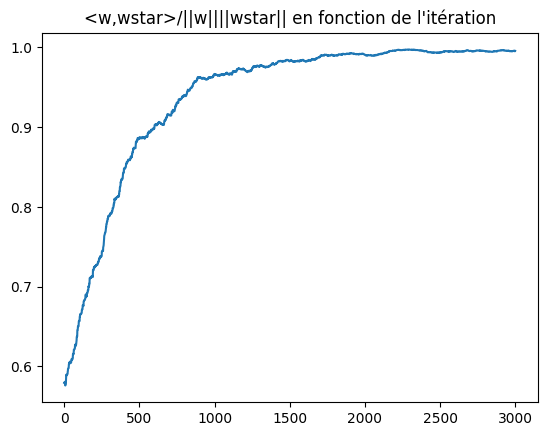

In [354]:
ps=np.zeros(len(wk))
for k in range(0,len(wk)):
  ps[k]=(wk[k][0]*w[0]+wk[k][1]*w[1])/(np.sqrt(wk[k][0]**2+wk[k][1]**2)*np.sqrt(w[0]**2+w[1]**2))

plt.plot(np.arange(len(ps)), ps)
plt.title("<w,wstar>/||w||||wstar|| en fonction de l'itération")

plt.show()

Vecteur estimé:

In [355]:
wk[-1]

array([[0.36496563],
       [0.6214362 ]])

Vecteur initial:

In [356]:
w

array([[0.57597123],
       [0.8005729 ]])

Observations empiriques (en faisant varier les paramètres ci-dessus):

* Un learning rate élevé permet de visiter une grande surface de l'espace des poids (là où un faible learning rate restreint les déplacements possibles par rapport à l'initialisation, empêchant de visiter d'autres régions potentiellement meilleures). Avec un learning rate élevé (supérieur à 0.1 dans notre cas), l'algorithme ne converge jamais vraiment, car le pas n'est pas suffisamment faible pour qu'il y ait réellement une "descente". Il est plus intéressant de prendre un petit learning rate, quitte à lancer l'algo SGD plusieurs fois de suite (avec des init random) pour visiter d'autres régions.
* Lorsque le learning rate est suffisamment faible, le vecteur estimé est "proche" du vrai vecteur de poids (au sens de $\frac{<w,wstar>}{||w||||wstar||}$).



**Ajout d'un bruit gaussien sur les données pour voir si SGD fonctionne toujours**

Ajout d'un bruit gaussien additif.

In [357]:
wk_BG,R_BG=SGD(x+np.random.normal(0,1,(100,2)),y+np.random.normal(0,1,(100,1)),3000)  # bruit gaussien

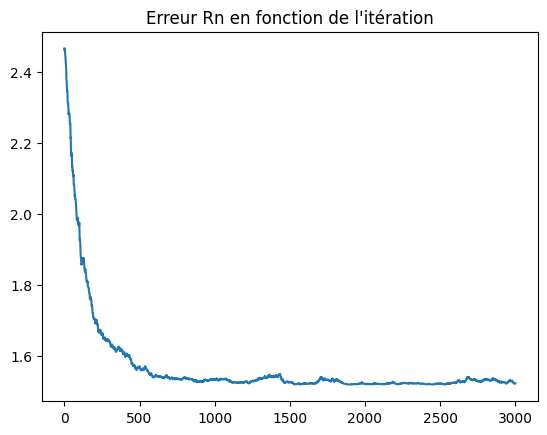

In [358]:
plt.plot(np.arange(len(R_BG)), R_BG)
plt.title("Erreur Rn en fonction de l'itération")

plt.show()

<ipython-input-359-9c0708132e18>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ps_BG[k]=(wk_BG[k][0]*w[0]+wk_BG[k][1]*w[1])/(np.sqrt(wk_BG[k][0]**2+wk_BG[k][1]**2)*np.sqrt(w[0]**2+w[1]**2))


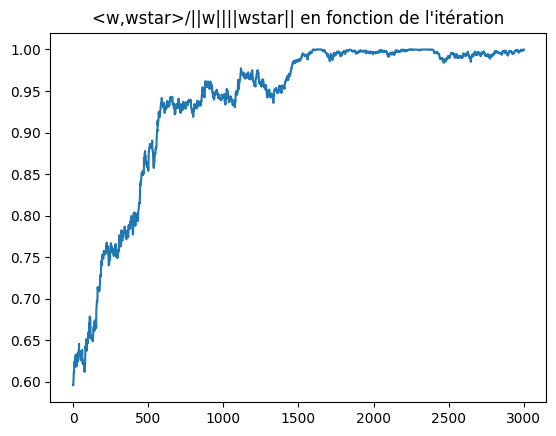

In [359]:
ps_BG=np.zeros(len(wk_BG))
for k in range(0,len(wk_BG)):
  ps_BG[k]=(wk_BG[k][0]*w[0]+wk_BG[k][1]*w[1])/(np.sqrt(wk_BG[k][0]**2+wk_BG[k][1]**2)*np.sqrt(w[0]**2+w[1]**2))

plt.plot(np.arange(len(ps_BG)), ps_BG)
plt.title("<w,wstar>/||w||||wstar|| en fonction de l'itération")

plt.show()

Vecteur estimé:

In [360]:
wk_BG[-1]

array([[0.21684388],
       [0.30545137]])

 Pour comparer simultanément les 2 jeux de données (non bruité vs bruité), appliquons simultanément SGD:

In [361]:
def SGD_compar(x1,y1,x2,y2,cmax):
  n=len(y1)
  compteur=0
  wk1=[]
  wk2=[]
  wk1.append(np.random.randn(2,1))
  wk2.append(wk1[0])
  R1=[Rn(x1,y1,wk1[0],n)]
  R2=[Rn(x2,y2,wk2[0],n)]
  while compteur<cmax:
    Wkp1=rd.randint(0,n-1)
    wk1.append(wk1[compteur]-0.001*g(x1,y1,wk1[compteur],Wkp1).reshape(2,1))
    wk2.append(wk2[compteur]-0.001*g(x2,y2,wk2[compteur],Wkp1).reshape(2,1))
    R1.append(Rn(x1,y1,wk1[compteur+1],n))
    R2.append(Rn(x2,y2,wk2[compteur+1],n))
    compteur+=1
  return wk1,R1,wk2,R2

wk,R,wk_BG,R_BG=SGD_compar(x,y,x+np.random.normal(0,1,(100,2)),y+np.random.normal(0,1,(100,1)),10000)

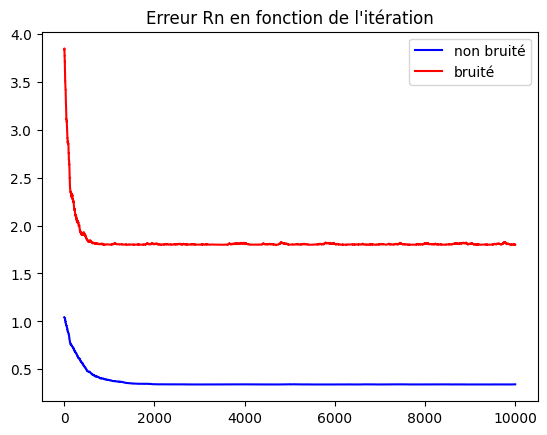

In [362]:
plt.plot(np.arange(len(R)), R, color="b", label="non bruité")
plt.plot(np.arange(len(R)), R_BG, color="r", label="bruité")
plt.legend()
plt.title("Erreur Rn en fonction de l'itération")

plt.show()

<ipython-input-363-c75fd47abaf9>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ps[k]=(wk[k][0]*w[0]+wk[k][1]*w[1])/(np.sqrt(wk[k][0]**2+wk[k][1]**2)*np.sqrt(w[0]**2+w[1]**2))
<ipython-input-363-c75fd47abaf9>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ps_BG[k]=(wk_BG[k][0]*w[0]+wk_BG[k][1]*w[1])/(np.sqrt(wk_BG[k][0]**2+wk_BG[k][1]**2)*np.sqrt(w[0]**2+w[1]**2))


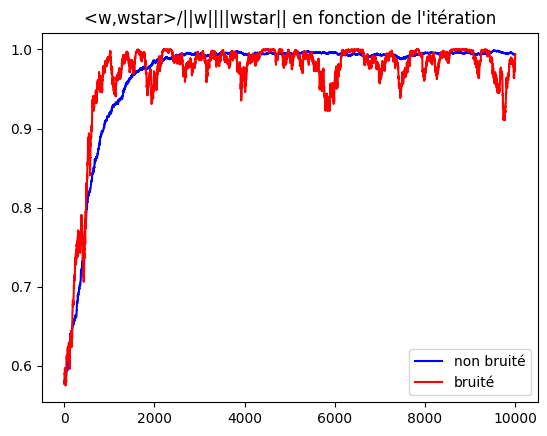

In [363]:
ps=np.zeros(len(wk))
ps_BG=np.zeros(len(wk_BG))
for k in range(0,len(wk)):
  ps[k]=(wk[k][0]*w[0]+wk[k][1]*w[1])/(np.sqrt(wk[k][0]**2+wk[k][1]**2)*np.sqrt(w[0]**2+w[1]**2))
  ps_BG[k]=(wk_BG[k][0]*w[0]+wk_BG[k][1]*w[1])/(np.sqrt(wk_BG[k][0]**2+wk_BG[k][1]**2)*np.sqrt(w[0]**2+w[1]**2))

plt.plot(np.arange(len(ps)), ps, color="b", label="non bruité")
plt.plot(np.arange(len(ps)), ps_BG, color="r", label="bruité")
plt.legend()
plt.title("<w,wstar>/||w||||wstar|| en fonction de l'itération")

plt.show()

Observations:

* Le jeu bruité conduit à des oscillations plus fortes dans l'algorithme que le jeu non bruité. Les oscillations pour le jeu non bruité sont négligeables par rapport aux oscillations du jeu bruité.
* L'amplitude des oscillations pour le jeu bruité dépend de l'exécution, donc pourrait dépendre du bruit et/ou de la condition initiale (qui est aléatoire dans SGD).
* Alors que le cas non bruité semble systématiquement se "stabiliser" sur un vecteur proche de la vraie solution (proche au sens de $\frac{<w,wstar>}{||w||||wstar||}$), le cas bruité semble explorer assez aléatoirement les solutions possibles.